# Price Prediction of Second hand cars by using Machine Learning

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Importing data from kaggle
data = pd.read_csv('second hand car details dataset.csv')

In [4]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


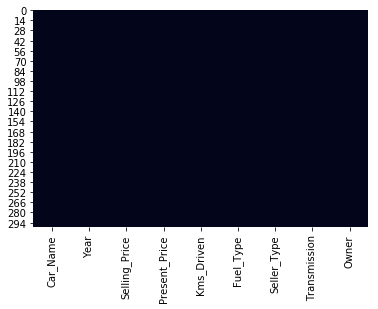

In [6]:
# Checking for null values
sns.heatmap(data.isnull(), cbar=False)

So, we can see, this dataset does not have any null values !

In [7]:
print(data['Owner'].unique())

[0 1 3]


In [10]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


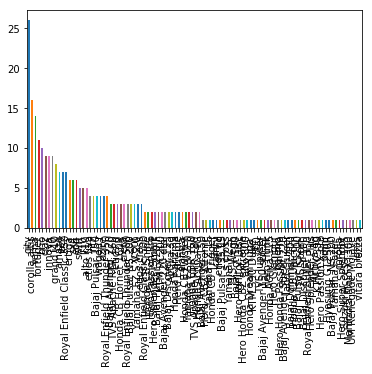

In [13]:
# Dropping Car name column as it is not of much use in analysis

data.Car_Name.value_counts().plot(kind="bar")

There are a number of different car names used in this dataset and so, it is of not much use..!

In [14]:
df=data[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

In [15]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Now, Chanhing year to number of years old <br>
 i.e., substracting each value with 2021

In [16]:
df['Present Year']=2021

In [18]:
df['Years old']=df['Present Year']-df['Year']

In [20]:
# Now, dropping the year column
df.drop(['Year'],axis=1, inplace=True)

In [22]:
df.drop(['Present Year'],axis=1, inplace=True)

In [24]:
df.tail()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years old
296,9.50,11.6,33988,Diesel,Dealer,Manual,0,5
297,4.00,5.9,60000,Petrol,Dealer,Manual,0,6
298,3.35,11.0,87934,Petrol,Dealer,Manual,0,12
299,11.50,12.5,9000,Diesel,Dealer,Manual,0,4
300,5.30,5.9,5464,Petrol,Dealer,Manual,0,5


### Making Dummy variables for OneHotEncoding


In [27]:
## dropping the first column to get rid of Dummy Variable trap
df=pd.get_dummies(df,drop_first=True)

In [28]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


### Correlations

In [29]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Years old,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


Text(0.5,1,'                             Selling price vs years old')

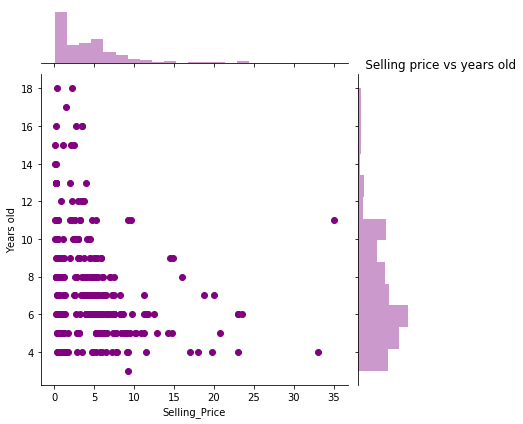

In [69]:
sns.jointplot(data=df, x= "Selling_Price" , y = "Years old", color = 'purple')
plt.title("                             Selling price vs years old")

### Plotting a Heatmap

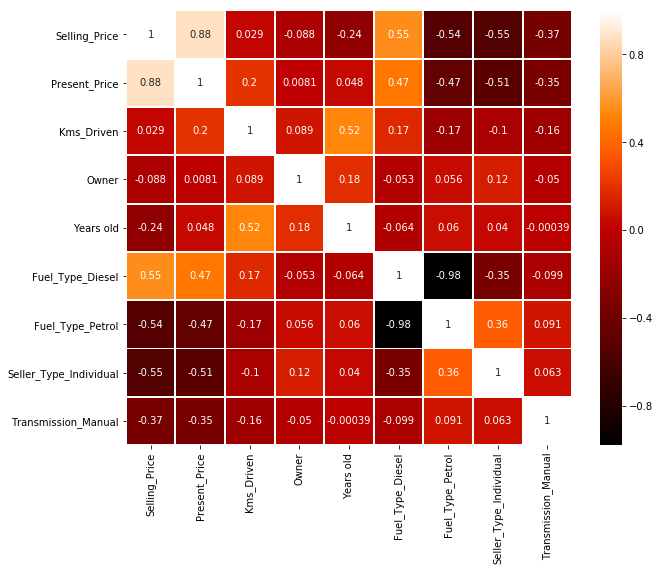

In [67]:
corrmat = df.corr()
corr_features = corrmat.index
plt.figure(figsize=(10,8))

g=sns.heatmap(df[corr_features].corr(),annot=True, linewidth =.9 , cmap="gist_heat")

### Plotting a scatterplot

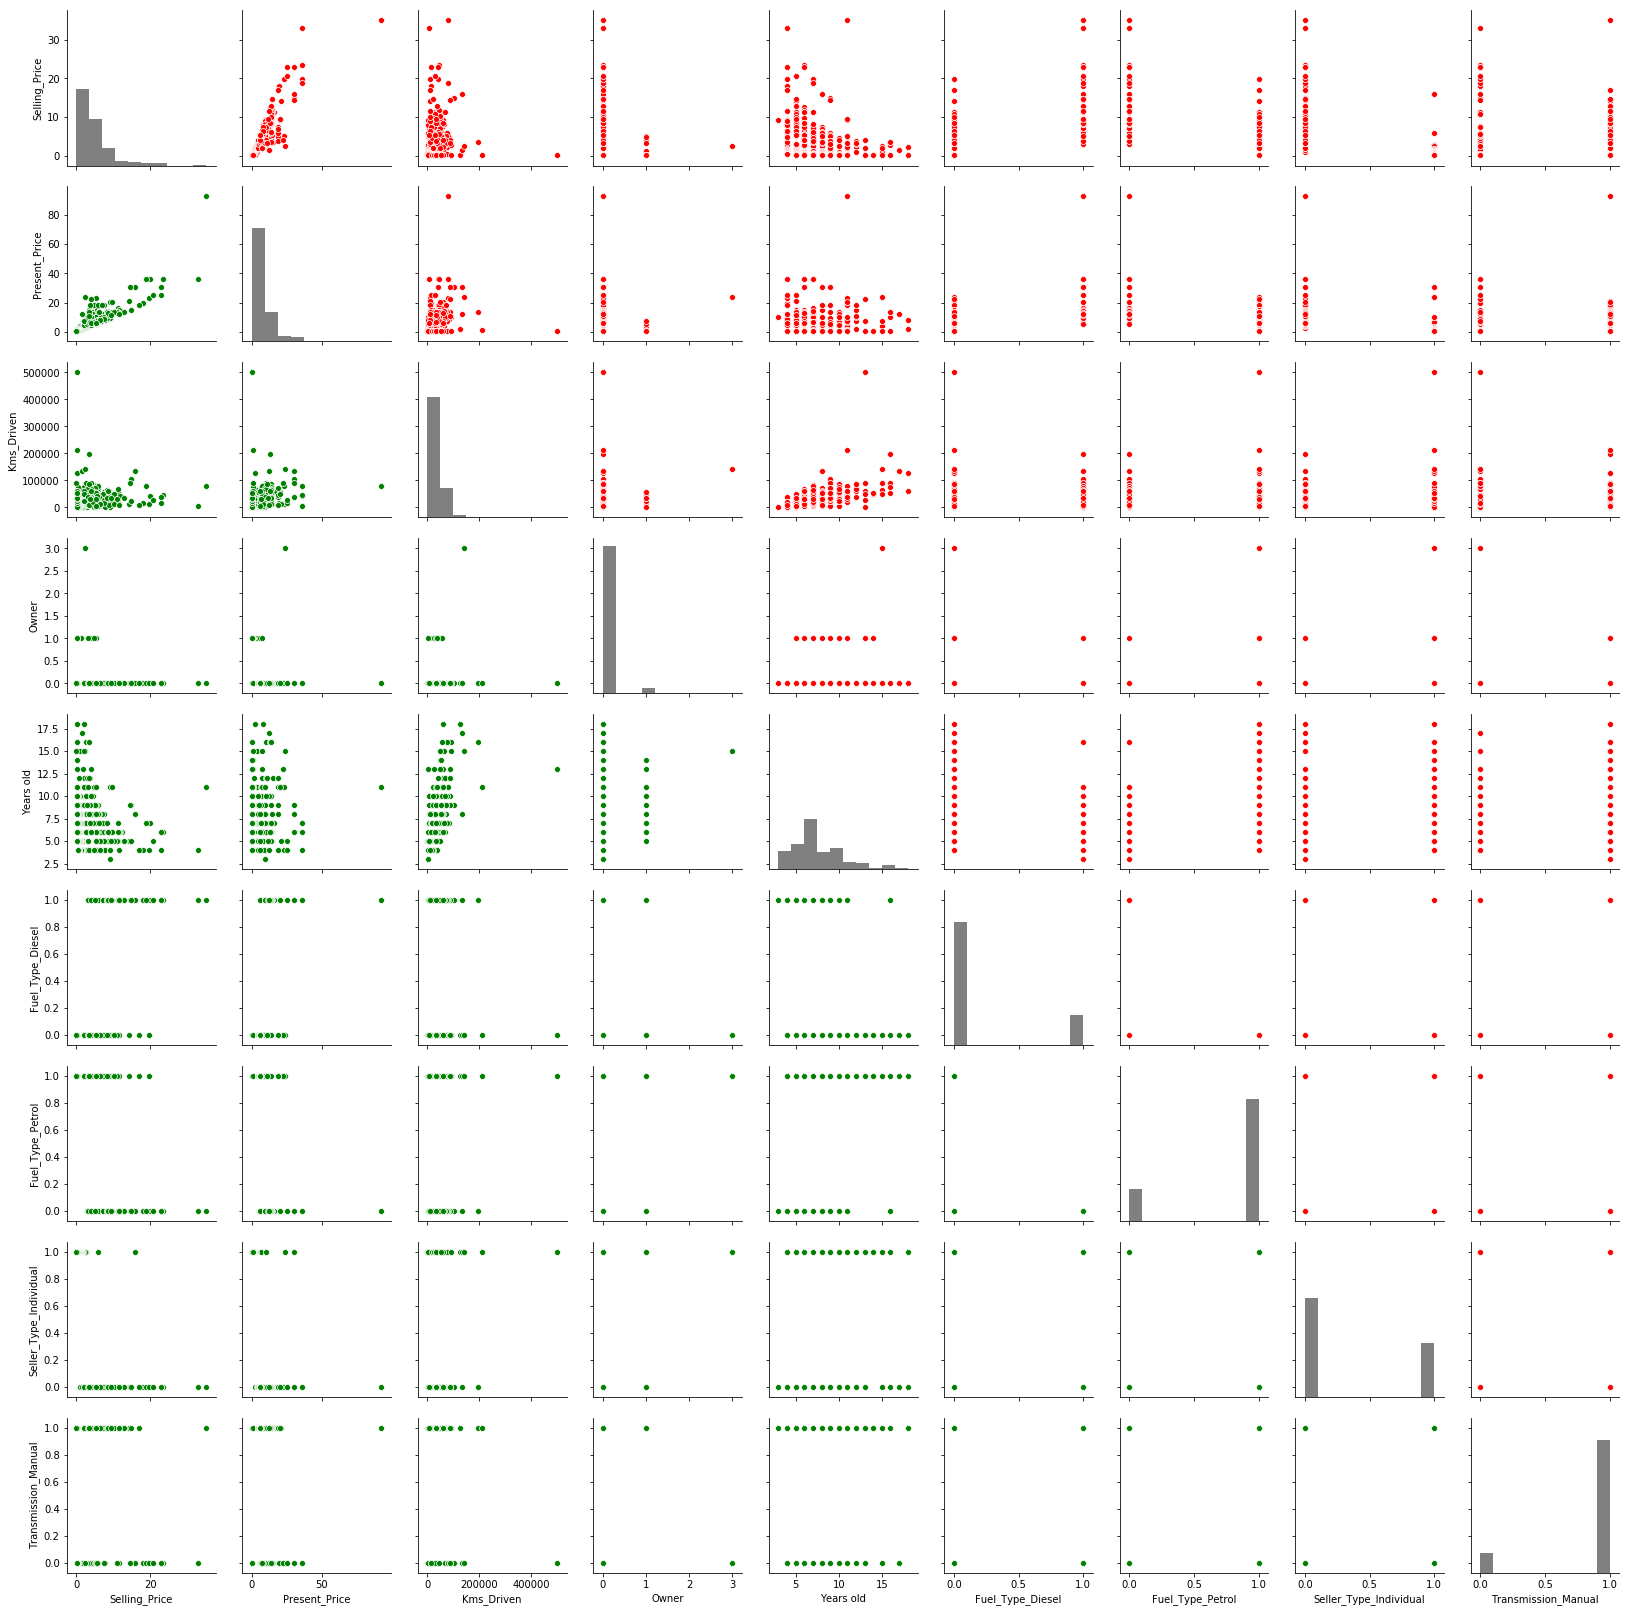

In [70]:
g = sns.PairGrid(df)
g.map_upper(sns.scatterplot,color='red')
g.map_lower(sns.scatterplot, color='green')
g.map_diag(plt.hist, color = 'grey')

### *Independent and Dependent Features*

In [72]:
# Selling price being the Dependent feature
X=df.iloc[:,1:]  #independent
y=df.iloc[:,0]

In [74]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

### Plotting  features :

ExtraTreesRegressor Model

In [76]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [77]:
print(model.feature_importances_)

[0.35968656 0.03692738 0.0008824  0.07832981 0.23265924 0.0127665
 0.12778484 0.15096328]


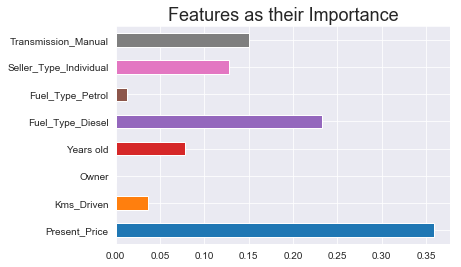

In [108]:
sns.set_style('darkgrid')
feat = pd.Series(model.feature_importances_, index=X.columns)
feat.plot(kind='barh')
plt.title("Features as their Importance", size =18)
plt.show()

From above , It can be concluded that Present Price is the most important feature...

### *Train Test Split*

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Using  *Random Forest Regressor*

In [110]:
from sklearn.ensemble import RandomForestRegressor

#### Hyperparameter Tuning

In [111]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


#### Using RandomizdSearchCV

In [112]:
from sklearn.model_selection import RandomizedSearchCV

In [113]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [114]:
## Selecting Parameters 

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [115]:
rf = RandomForestRegressor()

In [116]:
# Applying randomizedsearchcv
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

## Fitting the Model

In [117]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [118]:
# Looking for best Parameters 

rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [119]:
rf_random.best_score_

-4.027732954421797

## Prediction...

In [121]:
predict=rf_random.predict(X_test)

In [122]:
predict

array([ 7.2078 ,  0.54949,  5.06834,  9.22646, 16.39781,  5.02807,
        3.4098 ,  0.7659 ,  4.6066 ,  4.43975,  3.10378,  0.87514,
        5.023  ,  7.85216,  7.87254, 10.48578,  7.24259,  4.0881 ,
        0.4986 ,  1.46545,  4.05005,  4.66699,  5.60635,  9.4721 ,
        0.24326,  0.77204,  0.49631,  0.63347,  0.48192,  4.80672,
        5.28758,  5.8459 ,  0.49625,  8.75296,  3.48977,  1.17409,
        5.59505,  7.48038,  0.26841,  8.83   ,  9.28903, 19.39585,
        4.88952,  4.1342 ,  5.39885, 11.76638,  0.32648,  0.90355,
        4.99525,  8.38553,  7.35672,  3.54699,  4.6885 , 20.78656,
        1.09899,  1.0473 ,  0.51168,  2.76872,  3.7167 ,  1.31938,
        4.01506,  9.08874,  3.17752, 20.91536,  4.17105,  5.53065,
       10.41169,  4.82864,  0.57613,  2.98495,  3.40021,  3.03257,
        0.6527 ,  5.45025,  0.83098,  2.99084,  0.51003,  9.14812,
        1.12109,  2.71755,  0.50828, 10.09928,  7.4285 ,  5.51465,
        5.07315,  0.94612,  6.11736,  6.04519,  0.458  ,  5.00

### Plotting

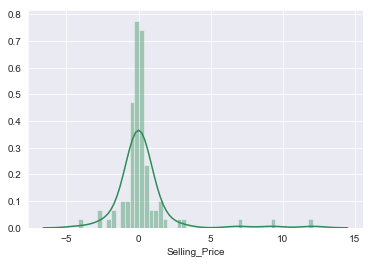

In [147]:
sns.distplot(y_test-predict, color='seagreen')

We can see a Normal Distribution curve !

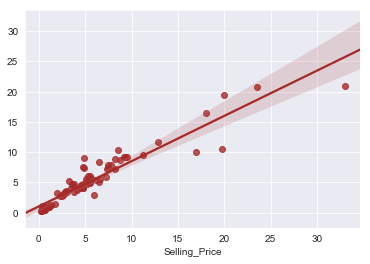

In [146]:
sns.regplot(y_test,predict, color ='brown')

### Looking for errors !

In [148]:
from sklearn import metrics

In [150]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.8871753846153858
Mean Squared Error: 3.9989340606087933
Root Mean Squared Error: 1.9997334973962888
